#**BigMart Sales Prediction**
##Introduction
This is a Machine Learning project on the BigMart Sales Dataset. The purpose of this project is to:
- Understand the Dataset & cleanup
- Build Regression models to predict the sales of the products
- Evaluate the models & compare their respective scores like R2, RMSE, etc.


This project is sequenced in the following steps:
- step1: Problem Statement
- step2: BigMart Dataset Description
- step3: Data Exploration
- step4: Data Cleaning
- step5: Feature Engineering
- step6: Prepare the Model
- step7: Cross Validation, Training & Evaluation
- step8: Conclusion


#**Step1: Problem Statement**
Sales prediction is an important aspect of different companies. It allows companies to efficiently allocate resources, to estimate achievable sales revenue and to plan a better strategy for future growth of the company.

**The aim** is to build *some predictive models* to predict *the sales of each product at a particular store* and compare their scores.
Using these models, BigMart will try to understand **the properties of products and stores** which play a key role in increasing sales.

This is **a supervised machine learning problem** with a target label as (Item_Outlet_Sales). Also since we are expected to predict the sales price for a given product, it becomes **a regression task**.

#**step2:   BigMart Dataset Description**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, 12 attributes of each product and store have been defined, as below mentioned:
1.   **Item_Identifier** ---- Unique product ID
2.   **Item_Weight** ---- Weight of product
3.   **Item_Fat_Content** ---- Whether the product is low fat or not
4.   **Item_Visibility** ---- The % of the total display area of all products in a store allocated to the particular product
5.   **Item_Type** ---- The category to which the product belongs
6.   **Item_MRP** ---- Maximum Retail Price (list price) of the product
7.   **Outlet_Identifier** ---- Unique store ID
8.   **Outlet_Establishment_Year** ---- The year in which the store was established
9.   **Outlet_Size** ---- The size of the store in terms of ground area covered
10.  **Outlet_Location_Type**---- The type of city in which the store is located
11.  **Outlet_Type** ---- Whether the outlet is just a grocery store or some sort of supermarket
12.  **Item_Outlet_Sales** ---- sales of the product in a particular store. This is **the outcome variable to be predicted.**

This Dataset can be downloaded from: [kaggle](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data)

Kaggle have both train.csv(8523,12) & test.csv(5681,11) sets, but we don't have the target column of test and we can't evaluate the model, so we just used train set.

In [66]:
# Download DataSet
!gdown https://drive.google.com/uc?id=1YZyU9Fb8GQ9m9peWiHgr-WJYZNWJcz47
# !gdown 1YZyU9Fb8GQ9m9peWiHgr-WJYZNWJcz47


Downloading...
From: https://drive.google.com/uc?id=1YZyU9Fb8GQ9m9peWiHgr-WJYZNWJcz47
To: /content/BigMart_Train.csv
100% 870k/870k [00:00<00:00, 113MB/s]


In [67]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, GroupKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [68]:
#Loading the Dataset
data = pd.read_csv('BigMart_Train.csv')

#check the 5 sample rows of dataset
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
576,DRB48,16.75,Regular,0.000000,Soft Drinks,39.3822,OUT046,1997,Small,Tier 1,Supermarket Type1,353.5398
1071,NCE07,8.18,low fat,0.013128,Household,142.0154,OUT035,2004,Small,Tier 2,Supermarket Type1,1985.4156
2729,FDN04,11.80,Regular,0.014144,Frozen Foods,180.4344,OUT018,2009,Medium,Tier 3,Supermarket Type2,535.3032
2845,FDN04,11.80,Regular,0.014116,Frozen Foods,178.5344,OUT045,2002,NaN,Tier 2,Supermarket Type1,3390.2536
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804


In [69]:
# Dimension of the dataset
data.shape

(8523, 12)

In [70]:
#name of columns
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'], dtype='object')

#**step3: Data Exploration**

In this step, after having a look at the dataset & some plots, certain information about the data was explored:
- 5 **numerical** and 7 **categorical** columns
- **'Item_weight'** and **'Outlet_size'** have **missing values**
-  the **min** value of **'Item_Visibility'** is **zero**, it's impossible because each product takes some space
- dataset is about 1559 unique products in 10 unique outlet
- *Item_Type* contains 16 unique values and most of them is Fruits and Vegetables
- Each unique *Item_Identifier* started with FD, DR, NC that refer to Food, Drink and Non-Consumable
- *Two types* of **Item_Fat_Content** are there but some of them are misscoded as (*'low fat', 'LF'*) instead of **'Low Fat'** and *'reg'* instead of **'Regular'**
- Item_Visibility and Item_Outlet_Sales seems to have outliers
- Item_Visibility and Item_Outlet_Sales are right skewed distribution


In [71]:
#some information about the attributes(datatypes & null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


5 numerical and 7 categorical columns


In [72]:
#Check for Null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item_weight' and 'Outlet_size' columns have missing values.

In [73]:
#Check statistical information of numerical values

numerical_features = data.select_dtypes(include=[np.number])
data.describe(include=[np.number])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


the min value of 'Item_Visibility' is zero, it's impossible because each product takes some space.

In [74]:
#Check statistical information of categorical values

categorial_features = data.select_dtypes(include=object)
data.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [75]:
#Check Unique Values of categorical attributes and their counts

for cat_col in categorial_features:
  if len(data[cat_col].unique()) <20:
    print("\n\n===> Unique Values & it's count of '{}' : \n{}".format(cat_col, data[cat_col].value_counts()))
  else:
    print("\n\n===> Unique Values of '{}' : \n{}".format(cat_col, data[cat_col].unique()))



===> Unique Values of 'Item_Identifier' : 
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


===> Unique Values & it's count of 'Item_Fat_Content' : 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


===> Unique Values & it's count of 'Item_Type' : 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


===> Unique Values & it's count of 'Outlet_Identifier' : 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT01

Each unique Item_Identifier started with FD, DR, NC that refer to Food, Drink and Non-Consumable.

Two types of Item_Fat_Content are there but some of them are misscoded as ('low fat', 'LF') instead of 'Low Fat' and 'reg' instead of 'Regular'.

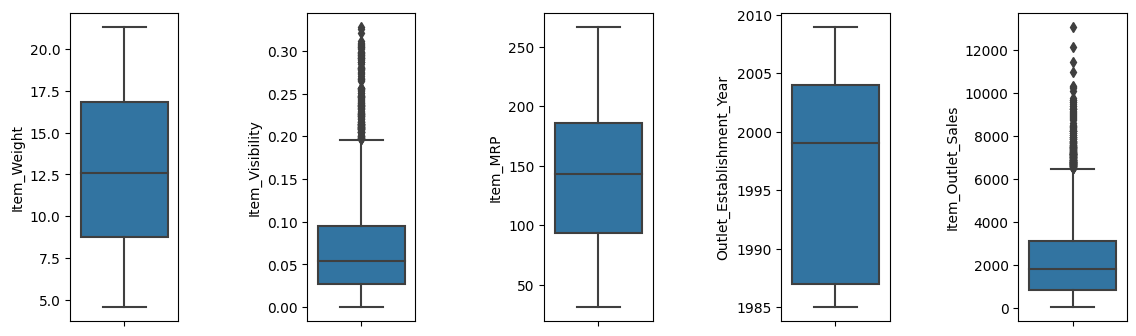

In [76]:
#plot numerical features to gain some insights
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(12, 4))
index = 0
axs = axs.flatten()
for k,v in data.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=3, w_pad=4, h_pad=8.0)

Item_Visibility and Item_Outlet_Sales  seems to have outliers.

In [77]:
#check outliers percentage of each column
for k, v in data.select_dtypes(include=[np.number]).items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Item_Weight outliers = 0.00%
Column Item_Visibility outliers = 1.69%
Column Item_MRP outliers = 0.00%
Column Outlet_Establishment_Year outliers = 0.00%
Column Item_Outlet_Sales outliers = 2.18%


In [78]:
#delete outliers of Item_Visibility   ( >= 0.195979015)
# data = data[~(data['Item_Visibility'] >= 0.35)]
# data.shape

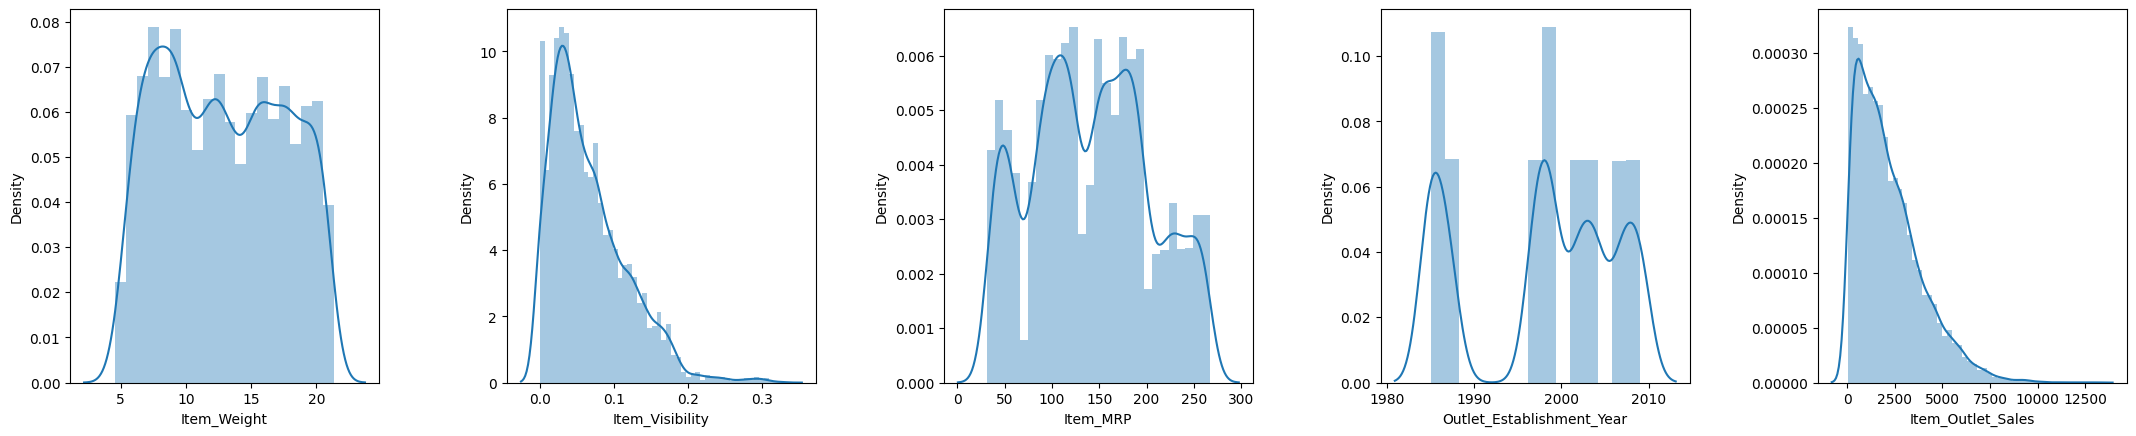

In [79]:
#distribution of numerical features
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(22, 5))
index = 0
axs = axs.flatten()
for k,v in data.select_dtypes(include=[np.number]).items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=3, w_pad=3, h_pad=8.0)

Item_Visibility and Item_Outlet_Sales deviate from normal distribution, they have right skewed.


#**step4: Data Cleaning**
In this step, we did some Data Cleaning Techniques for Preparing our data, like find and impute Missing values, remove and fix incorrect values. There are different methods to treat missing values based on the problem and the data like, deleting the rows, Mean/Median/Mode Imputation, etc.
## Missing values in *Item_Weight*

> it's a continuous variable, missing values can be replaced with mean or median. it's boxplot, shows no "Outliers" and we can impute the missing values with *Mean*. for a better result Missing values of Item_Weight filled by **the mean of weight for that particular item**.



## Missing values in *Outlet_Size*


> it's a categorical variable, missing values can be replaced with mode of the given values. for a better result Missing values of Outlet_Size filled by **the mode of the Outlet_Size for that particular type of outlet**.

## Zero values in *Item_Visibility*  


> it's impossible because each product needs to be visible, so we can treat these zero values as a missing value. Item_Visibility is a continuous variable, missing values can be replaced with mean or median, since it's right skewed & has outliers so we can't use mean to replace zero values (mean affected by outliers), median is more appropriate. for a better result Zero values of Item_Visibility replaced by **the median of Visibility for that particular item**.



## Clean values in *Item_Fat_Content*


> Two types of Item_Fat_Content are there but some of them are misscoded as ('low fat', 'LF') instead of 'Low Fat' and 'reg' instead of 'Regular', so we combined values in two categories : Low Fat and Regular.








In [80]:
# Impute Missing Values of Item_Weight
# use aggregation funtion of pivot table, for keeping average of weights. ** For those unique items that they don't have any weights use the mean of whole column.

mean_Wper_items = pd.pivot_table(data, columns='Item_Identifier', values='Item_Weight', aggfunc=np.mean, fill_value=data['Item_Weight'].mean() , dropna=False)
mean_Wper_items

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Weight,11.6,19.35,8.27,7.39,6.115,8.785,12.3,16.75,5.92,17.85,...,8.485,19.6,12.15,7.825,15.0,6.59,19.85,10.5,9.6,14.65


In [81]:
# Impute missing values of Item_Weight with mean weight based on the Item_Identifier variabe

missing_values = data['Item_Weight'].isnull()
data.loc[missing_values, 'Item_Weight'] = data.loc[missing_values, 'Item_Identifier'].apply(lambda x: mean_Wper_items[x].Item_Weight)

In [82]:
# Impute Missing Values of Outlet_Size
# use aggregation funtion of pivot table, for keeping mode of Outlet_Size.

mode_Osize_per_Otype = pd.pivot_table(data, columns='Outlet_Type', values='Outlet_Size', aggfunc=lambda x: x.mode().iat[0], fill_value=data['Outlet_Size'].mode()[0] , dropna=False)
mode_Osize_per_Otype


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [83]:
# Impute missing values of Outlet_Size with mode Outlet_Size based on the Outlet_Type variabe

missing_valuessize = data['Outlet_Size'].isnull()
data.loc[missing_valuessize, 'Outlet_Size'] = data.loc[missing_valuessize, 'Outlet_Type'].apply(lambda x: mode_Osize_per_Otype[x].Outlet_Size)


In [84]:
# Check for nulls again
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

now we don't have any null value.

In [85]:
# Replace zero values of Item_Visibility, pivot table for median of visibility(each particular item). For those unique items that their visibilities are 0 use the median of whole column.

median_visibility = pd.pivot_table(data, columns='Item_Identifier', values='Item_Visibility', aggfunc=np.median )
median_visibility.replace(to_replace=0, value=data['Item_Visibility'].median(), inplace=True)
median_visibility
# median_visibility['FDY07'][0]

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Visibility,0.041012,0.03999,0.128027,0.082171,0.007055,0.020614,0.069595,0.024849,0.019219,0.037856,...,0.058121,0.094308,0.079512,0.186357,0.071444,0.02618,0.064409,0.011286,0.024515,0.083489


In [86]:
# Impute zero values with median visibility of that product

zero_values = (data['Item_Visibility'] == 0)
print ('Number of zero values: {}'.format(sum(zero_values)))

data.loc[zero_values,'Item_Visibility'] = data.loc[zero_values,'Item_Identifier'].apply(lambda x: median_visibility[x].Item_Visibility)
print ('Number of zero values after replacing with median: {}'.format(sum(data['Item_Visibility'] == 0)))

Number of zero values: 526
Number of zero values after replacing with median: 0


In [87]:
# Combine values in two categories : Low Fat and Regular
data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#**step5: Feature engineering**
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model. process like Feature Extranction, Feature Selection, Encoding categorical data, Correlation Analysis, etc.
##Extract *New_Item_Type*

> Each unique Item_Identifier started with FD, DR, NC that refer to Food, Drink and Non-Consumable, so we can extract new feature from the existing attribute, as New_Item_Type.

##Update *Item_Fat_Content*

> change the values of Item_Fat_Content whereever New_Item_Type is non-consumable, because those items cannot have any fat content.

##Encoding Categorical Data

> convert categorical features into numerical ones, by using Label Encoding and getdummies.
##Feature Selection


> Check 2 things: the correlations between all of the features and feature importance, then delete unnecessary features











In [88]:
# Create New_Item_Type variable that extracted from Item_Identifier column
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['New_Item_Type'].replace({'FD': 'Food' , 'DR': 'Drink' , 'NC': 'Non_Consumable' }, inplace=True)
data['New_Item_Type'].value_counts()

Food              6125
Non_Consumable    1599
Drink              799
Name: New_Item_Type, dtype: int64

In [89]:
# Update Item_Fat_Content values, add "None" value for Non_Consumable items
data.loc[data['New_Item_Type'] == 'Non_Consumable' , 'Item_Fat_Content'] = 'None'
data['Item_Fat_Content'].value_counts()

Low Fat    3918
Regular    3006
None       1599
Name: Item_Fat_Content, dtype: int64

In [111]:
prepro_data = data.copy()

In [112]:
# Encoding Categorical Data
#LabelEncoder:
lblencoder = LabelEncoder()
attr_to_le = ['Item_Identifier', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type']
#attr_to_le = ['Item_Identifier', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content', 'Outlet_Identifier', 'New_Item_Type', 'Outlet_Type']
for attr in attr_to_le:
  prepro_data[attr] = lblencoder.fit_transform(prepro_data[attr])

item_IDS = prepro_data['Item_Identifier']

#get_dummies:
attr_to_gd = ['Item_Fat_Content', 'Outlet_Identifier', 'New_Item_Type', 'Outlet_Type']
prepro_data = pd.get_dummies(prepro_data, columns= attr_to_gd)

print(prepro_data.shape)
prepro_data.head()

(8523, 29)


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,New_Item_Type_Drink,New_Item_Type_Food,New_Item_Type_Non_Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,1999,1,0,3735.1380,1,...,0,0,1,0,1,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,2009,1,2,443.4228,0,...,0,0,0,1,0,0,0,0,1,0
2,662,17.50,0.016760,10,141.6180,1999,1,0,2097.2700,1,...,0,0,1,0,1,0,0,1,0,0
3,1121,19.20,0.022861,6,182.0950,1998,2,2,732.3800,0,...,0,0,0,0,1,0,1,0,0,0
4,1297,8.93,0.006590,9,53.8614,1987,0,2,994.7052,0,...,0,0,0,0,0,1,0,1,0,0


In [113]:
# Check new columns
prepro_data.columns
# prepro_data.isnull().sum()

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_None', 'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'New_Item_Type_Drink', 'New_Item_Type_Food', 'New_Item_Type_Non_Consumable', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'], dtype='object')

In [114]:
# Check the correlations between all of the features
corr_matrix = prepro_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
to_drop

['New_Item_Type_Non_Consumable',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

we found 3 features with correlation greater than 0.90. now, we have to check and find the other pair of these correlated features.

In [115]:
# Find other pair of correlated features
pd.set_option('display.width', 1000)
for i in range(len(to_drop)):
  print(corr_matrix.loc[corr_matrix[to_drop[i]].abs() > 0.9, corr_matrix[to_drop[i]].abs() > 0.9].to_markdown() , '\n\n')

|                              |   Item_Fat_Content_None |   New_Item_Type_Non_Consumable |
|:-----------------------------|------------------------:|-------------------------------:|
| Item_Fat_Content_None        |                       1 |                              1 |
| New_Item_Type_Non_Consumable |                       1 |                              1 | 


|                               |   Outlet_Identifier_OUT018 |   Outlet_Type_Supermarket Type2 |
|:------------------------------|---------------------------:|--------------------------------:|
| Outlet_Identifier_OUT018      |                          1 |                               1 |
| Outlet_Type_Supermarket Type2 |                          1 |                               1 | 


|                               |   Outlet_Identifier_OUT027 |   Outlet_Type_Supermarket Type3 |
|:------------------------------|---------------------------:|--------------------------------:|
| Outlet_Identifier_OUT027      |           

These features are all highly correlated with one another. we will remove all columns that refers to Outlet_Identifier.


In [116]:
# Delete unnecessary features (1)
prepro_data.drop(['Item_Identifier','Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
                  'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027','Outlet_Identifier_OUT035',
                  'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'], axis=1, inplace=True)
# prepro_data.drop(['Item_Type'], axis=1, inplace=True)


Let's check feature importance, then we can make a better decision.

Item_MRP                         0.505821
Outlet_Type_Grocery Store        0.271457
Outlet_Type_Supermarket Type3    0.078516
Item_Visibility                  0.043511
Item_Weight                      0.036229
Outlet_Establishment_Year        0.031841
Item_Type                        0.015826
Outlet_Location_Type             0.002723
Item_Fat_Content_Low Fat         0.002361
Item_Fat_Content_Regular         0.002111
Outlet_Type_Supermarket Type1    0.001881
Outlet_Size                      0.001851
New_Item_Type_Drink              0.001589
New_Item_Type_Food               0.001479
Outlet_Type_Supermarket Type2    0.001207
Item_Fat_Content_None            0.000828
New_Item_Type_Non_Consumable     0.000769
dtype: float64 




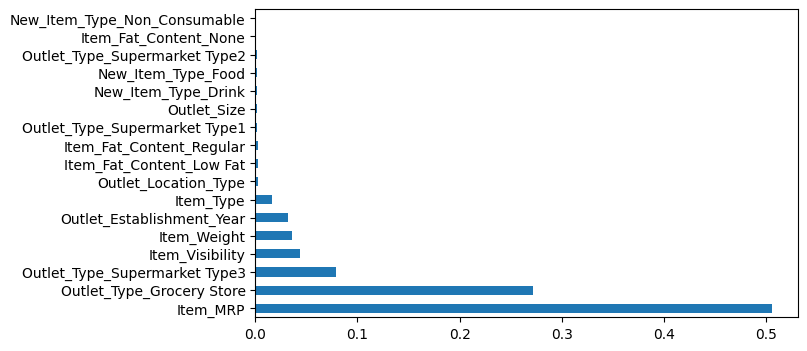

In [117]:
#plot the important features
train_X = prepro_data.drop('Item_Outlet_Sales', axis=1)
train_y = prepro_data['Item_Outlet_Sales']
RFR = RandomForestRegressor(max_depth=10)
#fitting the model
RFR.fit(train_X, train_y)
plt.figure(figsize=(7,4))
feat_importances = pd.Series(RFR.feature_importances_, index = train_X.columns)
#feat_importances.nlargest(7).plot(kind='barh');
feat_importances.nlargest(prepro_data.shape[1]).plot(kind='barh');
print(feat_importances.sort_values(ascending= False), '\n\n')


As we see in correlation matrix, Item_Fat_Content_None & New_Item_Type_Non_Consumable columns are completely correlated. Item_Fat_Content_None refers to those non_consumable items that don't have fat content. also, feature importance show that they have least importance value. so, we remove this column.

In [118]:
# Delete unnecessary features (2)
prepro_data.drop(['Item_Fat_Content_None'], axis=1, inplace=True)


In [119]:
prepro_data.shape

(8523, 17)

#**step6: Prepare the Model**
After completing the preprocessing steps(data exploration, data cleaning and feature engineering), the dataset is ready and set to build predictive models. First, set Features as predictor variables(X) and target as response variable(y). Then, for some popular predictive techniques like Linear Regression, Lasso, Ridge, Random forest and XGBoost, defined two functions: hyperparameter_tuning() & training_evaluation().
##- hyperparameter_tuning
> This function tuned some parameters of predictive models like alpha, degree for Lasso & Ridge, n_estimators, max_depth, min_samples_leaf for RandomForestRegressor and n_estimators, learning_rate, max_depth for XGBRegressor.
##- training_evaluation
> This function prepared the model with tuned hyperparameters, train and evaluate it by Kfold,GroupKfold cross validation, use some evaluation metrics like: R2, RMSE, MSE and MAE.




In [124]:
# Set features and target
X = prepro_data.drop('Item_Outlet_Sales', axis=1)
y = prepro_data['Item_Outlet_Sales']


# Set type of cross validation(KFold or GroupKFold , k=7)
# in GroupKFold: the group of data is item_identifier. it means that each group refers to a unique product. as we know, dataset is about sales of 1559 unique products in 10 unique outlet.

cross_val = ['GroupKFold',7]
# cross_val = ['KFold', 7]


In [125]:
#dataframe for keeping the results of models
ML_models_info = pd.DataFrame(columns=['model', 'validation' ,'MAE' ,'MSE', 'RMSE', 'r2_score', 'coef'])

In [126]:

def training_evaluation(model_name, model, cross_val, X, y):

  if (model_name == 'Lasso'):
     #make pipeline for normalizatuion, polynomialFeatures, train & evaluation
     degree_L1, alpha_L1 = hyperparameter_tuning('L1_reg_model')
     #degree_L1, alpha_L1 = (2,3)
     L1_reg_model = Lasso(alpha= alpha_L1 , warm_start=True)
     pipeline_model = Pipeline(steps=[('scaler', MinMaxScaler()) , ('PolynomialFeatures' , PolynomialFeatures(degree= degree_L1)) , ('model', L1_reg_model)], verbose=True)

  elif (model_name == 'Ridge'):
     #make pipeline for normalizatuion, polynomialFeatures, train & evaluation
     degree_L2, alpha_L2 = hyperparameter_tuning('L2_reg_model')
     #degree_L2, alpha_L2 = (2,4)
     L2_reg_model = Ridge(alpha= alpha_L2)
     pipeline_model = Pipeline(steps=[('scaler', MinMaxScaler()) , ('PolynomialFeatures' , PolynomialFeatures(degree= degree_L2)) , ('model', L2_reg_model)], verbose=True)

  else:
    #make pipeline for normalizatuion, train & evaluation
    pipeline_model = Pipeline(steps=[('scaler', MinMaxScaler()) , ('model', model)], verbose=True)

  #metrics:
  scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

  #set cross validation & evaluate the model with multiple metrics
  if (cross_val[0] == 'GroupKFold'):

    # ===> grouping by item_IDs:
    gkf = GroupKFold(n_splits=cross_val[1])
    scores = cross_validate(pipeline_model, X, y, cv=gkf, groups= item_IDS.tolist(), scoring=scoring , n_jobs=-1 , return_train_score=True, return_estimator=True )
    #X_without_Item_type = X.drop('Item_Type',axis=1)
    #scores = cross_validate(pipeline_model, X_without_Item_type, y, cv=gkf, groups= item_IDS.tolist(), scoring=scoring , n_jobs=-1 , return_train_score=True, return_estimator=True )

  elif (cross_val[0] == 'KFold'):
    kf = KFold(n_splits=cross_val[1], shuffle=True)
    scores = cross_validate(pipeline_model, X, y, cv= kf, scoring=scoring, n_jobs=-1 , return_train_score=True, return_estimator=True)
    #X_without_Item_type = X.drop('Item_Type',axis=1)
    #scores = cross_validate(pipeline_model, X_without_Item_type, y, cv= kf, scoring=scoring, n_jobs=-1 , return_train_score=True, return_estimator=True)

  print('\n{} with {}, k={} report: \n \n===>Train Score:'.format(model_name, cross_val[0], cross_val[1]))
  print('The average of R2 score is : %0.4f  (+/- %0.2f) \n\n===>Test Scores:'% (scores['train_r2'].mean(), scores['train_r2'].std()))
  print('The average of MAE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_mean_absolute_error']).mean(), np.absolute(scores['test_neg_mean_absolute_error']).std()))
  print('The average of MSE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_mean_squared_error']).mean(), np.absolute(scores['test_neg_mean_squared_error']).std()))
  print('The average of RMSE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_root_mean_squared_error']).mean(), np.absolute(scores['test_neg_root_mean_squared_error']).std()))
  print('The average of R2 score is : %0.4f  (+/- %0.2f)'% (scores['test_r2'].mean(), scores['test_r2'].std()))

  #save importance
  if model_name in ['LinearRegression']:
    # coefs = pd.DataFrame([scores['estimator'][0].named_steps['model'].coef_ for idx,model in scores["estimator"]], columns= X.columns)  #just for CHECK!,get coefs of all cross fold validations, but they are the same, so use series!!
    coefs = pd.Series(scores['estimator'][0].named_steps['model'].coef_ , X.columns).sort_values(ascending=False)

  elif model_name in ['Lasso' , 'Ridge']:
    coefs = pd.Series(scores['estimator'][0].named_steps['model'].coef_ )

    # ls = pipeline_model[2].fit(X,y)                                       #just for CHECK!, just get coef for each column, although i know that we made a plonomial function and now i have too many features
    # coefs = pd.Series(ls.coef_ , X.columns).sort_values(ascending=False)  #just for CHECK! coefs2 its not coef of our lasso|ridge code  (ML_models_info.loc[6,'coef']) 6:row number

  elif model_name in ['RandomForestRegressor']:
    coefs = pd.Series(scores['estimator'][0].named_steps['model'].feature_importances_ , X.columns).sort_values(ascending=False)
  else:
    coefs = np.NaN


  #insert mae, mse, rmse, r2_score  &  coefs into a dataframe for comparing the models
  ML_models_info.loc[len(ML_models_info)] = [model_name, cross_val[0], np.absolute(scores['test_neg_mean_absolute_error']).mean(),
                                             np.absolute(scores['test_neg_mean_squared_error']).mean(),
                                             np.absolute(scores['test_neg_root_mean_squared_error']).mean(),
                                             scores['test_r2'].mean() ,
                                             coefs]



In [127]:
def hyperparameter_tuning(model):

  if(model == 'L1_reg_model'):
    pipeline = make_pipeline(MinMaxScaler(), PolynomialFeatures(), Lasso())
    hyp_pars = {'polynomialfeatures__degree': [2,3,4],
                'lasso__alpha': [0.5,2,3,5]}

  elif(model == 'L2_reg_model'):
    pipeline = make_pipeline(MinMaxScaler(), PolynomialFeatures(), Ridge())
    hyp_pars = {'polynomialfeatures__degree': [2,3,4],
                'ridge__alpha': [0.5,2,3,4]}

  elif(model == 'RandomForestRegressor'):
    pipeline = make_pipeline(MinMaxScaler(),  RandomForestRegressor())
    hyp_pars = {'randomforestregressor__n_estimators': [150, 200, 300, 400],
                'randomforestregressor__max_depth': [5, 6],
                'randomforestregressor__min_samples_leaf': [40, 50]}

  elif(model == 'XGBoost_Regressor'):
    pipeline = make_pipeline(MinMaxScaler(),  XGBRegressor())
    hyp_pars = {'xgbregressor__n_estimators': [450, 500, 600],
                'xgbregressor__learning_rate': [0.008, 0.01],
                'xgbregressor__max_depth': [3, 4]}

  gridsearch = GridSearchCV(pipeline, param_grid=hyp_pars, cv=3 ,scoring='neg_mean_squared_error', verbose=4)
  gridsearch.fit(X, y)
  best_model = gridsearch.best_estimator_
  best_parameters = gridsearch.best_params_
  print('\n',best_parameters)
  if(model == 'L1_reg_model'):
    return(best_parameters['polynomialfeatures__degree'], best_parameters['lasso__alpha'])

  elif(model == 'L2_reg_model'):
    return(best_parameters['polynomialfeatures__degree'], best_parameters['ridge__alpha'])

  elif(model == 'XGBoost_Regressor'):
    return(best_parameters['xgbregressor__n_estimators'], best_parameters['xgbregressor__learning_rate'],
           best_parameters['xgbregressor__max_depth'])

  elif(model == 'RandomForestRegressor'):
    return(best_parameters['randomforestregressor__n_estimators'], best_parameters['randomforestregressor__max_depth'],
           best_parameters['randomforestregressor__min_samples_leaf'])


# **step7: Cross Validation, Training & Evaluation**


In [128]:
# Linear regression Model
LR_reg_model = LinearRegression()
training_evaluation('LinearRegression', LR_reg_model, cross_val, X, y)


LinearRegression with GroupKFold, k=7 report: 
 
===>Train Score:
The average of R2 score is : 0.5627  (+/- 0.00) 

===>Test Scores:
The average of MAE is : 837.976  (+/- 31.94)
The average of MSE is : 1276876.058  (+/- 114351.94)
The average of RMSE is : 1128.835  (+/- 51.06)
The average of R2 score is : 0.5614  (+/- 0.02)


In [129]:
# Lasso(L1-Regularizarion)
L1_reg_model = Lasso()
training_evaluation('Lasso', L1_reg_model, cross_val, X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END lasso__alpha=0.5, polynomialfeatures__degree=2;, score=-1174126.953 total time=   0.5s
[CV 2/3] END lasso__alpha=0.5, polynomialfeatures__degree=2;, score=-1138434.685 total time=   0.4s
[CV 3/3] END lasso__alpha=0.5, polynomialfeatures__degree=2;, score=-1156663.642 total time=   0.7s
[CV 1/3] END lasso__alpha=0.5, polynomialfeatures__degree=3;, score=-1183424.003 total time=   4.9s
[CV 2/3] END lasso__alpha=0.5, polynomialfeatures__degree=3;, score=-1147301.290 total time=   3.8s
[CV 3/3] END lasso__alpha=0.5, polynomialfeatures__degree=3;, score=-1162743.614 total time=   3.1s
[CV 1/3] END lasso__alpha=0.5, polynomialfeatures__degree=4;, score=-1190898.343 total time=  16.0s
[CV 2/3] END lasso__alpha=0.5, polynomialfeatures__degree=4;, score=-1150901.073 total time=  14.4s
[CV 3/3] END lasso__alpha=0.5, polynomialfeatures__degree=4;, score=-1163700.816 total time=  16.7s
[CV 1/3] END lasso__alpha=2, polynomial

In [130]:
# Ridge(L2-Regularizarion)
L2_reg_model = Ridge()
training_evaluation('Ridge', L2_reg_model, cross_val, X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END polynomialfeatures__degree=2, ridge__alpha=0.5;, score=-1180570.822 total time=   0.0s
[CV 2/3] END polynomialfeatures__degree=2, ridge__alpha=0.5;, score=-1147652.546 total time=   0.1s
[CV 3/3] END polynomialfeatures__degree=2, ridge__alpha=0.5;, score=-1162611.857 total time=   0.1s
[CV 1/3] END polynomialfeatures__degree=2, ridge__alpha=2;, score=-1179759.270 total time=   0.1s
[CV 2/3] END polynomialfeatures__degree=2, ridge__alpha=2;, score=-1145286.441 total time=   0.1s
[CV 3/3] END polynomialfeatures__degree=2, ridge__alpha=2;, score=-1161398.463 total time=   0.1s
[CV 1/3] END polynomialfeatures__degree=2, ridge__alpha=3;, score=-1179786.167 total time=   0.1s
[CV 2/3] END polynomialfeatures__degree=2, ridge__alpha=3;, score=-1144527.954 total time=   0.1s
[CV 3/3] END polynomialfeatures__degree=2, ridge__alpha=3;, score=-1161122.522 total time=   0.1s
[CV 1/3] END polynomialfeatures__degree=2, ridge__a

In [131]:
# Random Forest Model
# RF_reg_model = RandomForestRegressor(n_estimators=300, max_depth= 6, min_samples_leaf= 40, n_jobs=4)

n_estimators, max_depth, min_samples_leaf = hyperparameter_tuning('RandomForestRegressor')
RF_reg_model = RandomForestRegressor(n_estimators= n_estimators, max_depth= max_depth, min_samples_leaf= min_samples_leaf, n_jobs=4)
training_evaluation('RandomForestRegressor', RF_reg_model, cross_val, X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=40, randomforestregressor__n_estimators=150;, score=-1196240.590 total time=   1.5s
[CV 2/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=40, randomforestregressor__n_estimators=150;, score=-1156855.489 total time=   1.6s
[CV 3/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=40, randomforestregressor__n_estimators=150;, score=-1169345.705 total time=   1.6s
[CV 1/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=40, randomforestregressor__n_estimators=200;, score=-1195305.097 total time=   2.1s
[CV 2/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=40, randomforestregressor__n_estimators=200;, score=-1156809.900 total time=   3.0s
[CV 3/3] END randomforestregressor__max_depth=5, randomforestregressor__mi

In [132]:
# XGBoost Model
# XGB_reg_model = XGBRegressor(n_estimators=450, learning_rate=0.01, max_depth= 3)

n_estimators, learning_rate, max_depth = hyperparameter_tuning('XGBoost_Regressor')
XGB_reg_model = XGBRegressor(n_estimators= n_estimators, learning_rate= learning_rate, max_depth= max_depth )
training_evaluation('XGBoost_Regressor', XGB_reg_model, cross_val, X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END xgbregressor__learning_rate=0.008, xgbregressor__max_depth=3, xgbregressor__n_estimators=450;, score=-1203926.125 total time=   3.0s
[CV 2/3] END xgbregressor__learning_rate=0.008, xgbregressor__max_depth=3, xgbregressor__n_estimators=450;, score=-1157233.762 total time=   2.0s
[CV 3/3] END xgbregressor__learning_rate=0.008, xgbregressor__max_depth=3, xgbregressor__n_estimators=450;, score=-1165454.502 total time=   1.7s
[CV 1/3] END xgbregressor__learning_rate=0.008, xgbregressor__max_depth=3, xgbregressor__n_estimators=500;, score=-1198785.229 total time=   1.9s
[CV 2/3] END xgbregressor__learning_rate=0.008, xgbregressor__max_depth=3, xgbregressor__n_estimators=500;, score=-1154415.084 total time=   1.9s
[CV 3/3] END xgbregressor__learning_rate=0.008, xgbregressor__max_depth=3, xgbregressor__n_estimators=500;, score=-1161019.702 total time=   1.9s
[CV 1/3] END xgbregressor__learning_rate=0.008, xgbregressor__m

In [133]:
#compare models metrics result
ML_models_info = ML_models_info.sort_values('r2_score', ascending=False)
ML_models_info

,model,validation,MAE,MSE,RMSE,r2_score,coef
1,Lasso,GroupKFold,752.550076,1.151979e+06,1072.119409,0.604349,0 0.000000 1 -0.000000 2 ...
4,XGBoost_Regressor,GroupKFold,753.685760,1.159030e+06,1075.409599,0.601880,NaN
2,Ridge,GroupKFold,756.927679,1.159939e+06,1075.845153,0.601578,0 0.000000 1 163.833088 2 ...
3,RandomForestRegressor,GroupKFold,754.853591,1.162625e+06,1077.046604,0.600676,Item_MRP 0.550375 Outl...
0,LinearRegression,GroupKFold,837.975806,1.276876e+06,1128.835322,0.561363,Item_MRP 3654.082766 O...


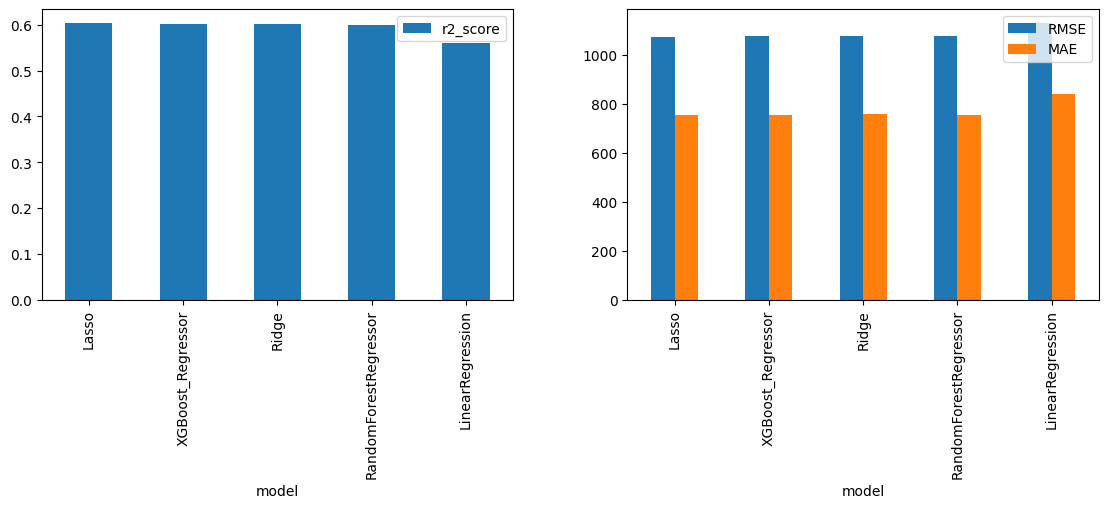

In [134]:
#plot models metrics result
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
index = 0
axs = axs.flatten()
for i in range(2):
  if i==1:
    ML_models_info.plot(kind='bar', x='model', y=['RMSE', 'MAE'], ax=axs[index])
  else:
    ML_models_info.plot(kind='bar', x='model', y=['r2_score'], ax=axs[index])
  index += 1
plt.tight_layout(pad=4, w_pad=5, h_pad=8.0)

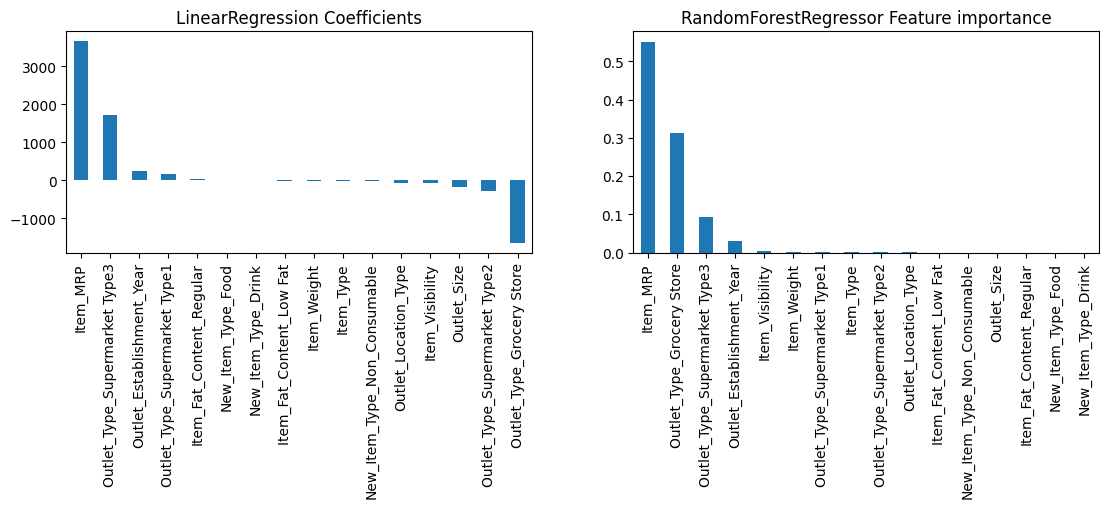

In [135]:
# plot feature importance
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
index = 0
axs = axs.flatten()
for i in range(2):
  if i==0:
    idx_LR = ML_models_info[ML_models_info['model'] == 'LinearRegression'].index.values
    ML_models_info.loc[idx_LR[0] , 'coef'].plot(kind='bar', title='LinearRegression Coefficients', ax=axs[index])
  else:
    idx_LR = ML_models_info[ML_models_info['model'] == 'RandomForestRegressor'].index.values
    ML_models_info.loc[idx_LR[0] , 'coef'].plot(kind='bar', title='RandomForestRegressor Feature importance', ax=axs[index])
  index += 1
plt.tight_layout(pad=4, w_pad=5, h_pad=8.0)
plt.show()





---
##Results of both Kfold & GroupKfold:

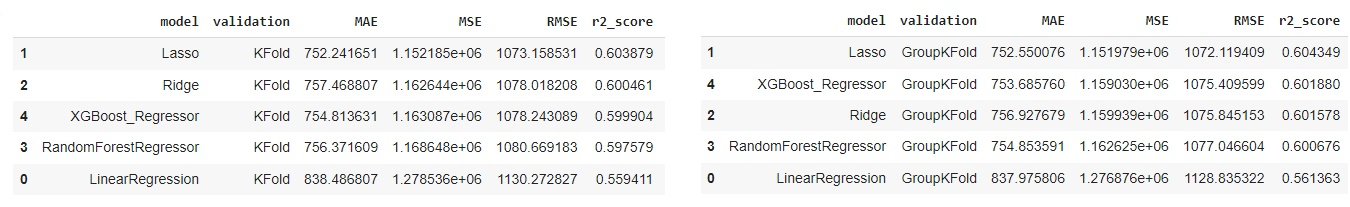

#**step8: Conclusion**
- as we see in feature importance of predictive models, the most important features are Item_MRP , Outlet_Type_Grocery Store , Outlet_Type_Supermarket Type3.
- Results of predictive models by Kfold and GroupKfold (grouped with item id), are very close, the best score is gained by Lasso model that based with groupKfold(degree of plonomial = 2 , alpha=3)


---

**Refrences:**

[**[1]**](https://ieeexplore.ieee.org/document/9067927) Behera, Gopal, and Neeta Nain. "Grid search optimization (GSO) based future sales prediction for big mart." In 2019 15th International Conference on Signal-Image Technology & Internet-Based Systems (SITIS), pp. 172-178. IEEE, 2019.

 [**[2]**](https://ieeexplore.ieee.org/document/8675060) Punam, Kumari, Rajendra Pamula, and Praphula Kumar Jain. "A two-level
statistical model for big mart sales prediction." In 2018 International Conference on Computing, Power and Communication Technologies (GUCON), pp.
617-620. IEEE, 2018.

